# SMD Python Hands On

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

## Table of Contents
<div id="toc"></div>

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width: 95% !important; }</style>"))

## Basics

Not really the topic of today, these are good starting materials:

* [PeP et al. Toolbox Workshop (German)](https://toolbox.pep-dortmund.org) 
* [Scientific Python Notebooks](https://github.com/maxnoe/scientific_python_notebooks)
* [A Byte Of Python](https://python.swaroopch.com/)

Especially for the Data Mining part, but a generally a very good resource:
* [The Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)



## Style Guide and Linter

* For python code, there is a generally accepted style guide: pep8. Follow it!

* The `flake8` tool checks for both the syntactical errors and style guide violations
    * `conda install flake8`
    * `flake8 test.py`
    
* Autoformatter
    * `black` reformats files so they follow the styleguide → not have to think about it anymore
    
* All good editors support linter, autocompletion, etc., recommendation would be VS Code (or VS Codium):
  * VS Code: https://marketplace.visualstudio.com/items?itemName=ms-python.python
  * Vim: https://github.com/neoclide/coc.nvim with https://github.com/fannheyward/coc-pyright

## conda environments

* Different projects might need different versions of python and libraries
* Best practice: isolated environments with fixed versions
* Using conda: conda environments
* Conda environments can be specified in text files listing needed packages and their versions 
* Download in Moodle: `environment.yml`.

* conda can be slow when installing or updating packages. Mamba is a much better and faster alternative:
    * For an existing conda installation, do:
      ```
      conda install -n base -c conda-forge mamba
      ```
    * For a fresh installation, download and install `mambaforge` here:  
      https://github.com/conda-forge/miniforge#mambaforge
        

Create a new environment using the definition file:

```
$ mamba env create -f environment.yml
```

To use the environment:
```
$ conda activate smd
```

Your python / ipython / jupyter should now come from this environment:
```
$ which python
/home/maxnoe/.local/conda/envs/smd/bin/python
```

## numpy

Short reminder of the most important numpy features for SMD

* Python is a dynamic, interpreted language. 
    * Easy to use
    * Powerful
    * Slow (large overhead, especially for simple numerical operations)
    
* Numpy is a library providing an efficient array implementation and access to fast code through compiled C++/C/Cython/Fortran code  
   ⇒ Application to large arrays as a whole or element-wise (vectorization)  
   ⇒ Rule of thumb: no for-loops over numpy arrays
   
* Many features for data analysis, random numbers, linear algebra, ...

* "Naive" python code being slow is one of the main criticisms of the language, especially for its use in science.

* Despite that, it is now the most commonly used language for data analysis.

* Most "hot" code is not actually python, but compiled code like numpy. Python is "the glue".

* There are several ways of making python code faster (e.g. numba, cython, ...) or replace it completely (Julia)

In [3]:
import numpy as np

## Data Types

Numpy supports many different data types, most important are probably these three

* bool: True / False
* int64: 64-Bit signed integer
* float64: 64-Bit floating point number

More on data types and how they work in the next lecture, "Numerical Foundations"

Numpy arrays have a fixed data type

In [4]:
# numpy arrays from python lists
floats = np.array([1.0, 3.14, 1e3])
ints = np.array([1, 2, 3])
bools = np.array([True, False, True])

print(floats.dtype, ints.dtype, bools.dtype)

float64 int64 bool


In [5]:
# Sowas geht nicht:

0.1 + 0.2 == 0.3

False

### Basic properties of numpy arrays

In [6]:
array2d = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

def array_info(a):
    print(f'{len(a)=}, {a.size=}, {a.ndim=}, {a.shape=}, {a.dtype=!s}')

array_info(floats)
array_info(array2d)

len(a)=3, a.size=3, a.ndim=1, a.shape=(3,), a.dtype=float64
len(a)=2, a.size=6, a.ndim=2, a.shape=(2, 3), a.dtype=int64


### Indexing & Masks

Numpy arrays can be indexed using (collections of) integers, slices or boolean masks

In [7]:
a = np.array([1, -3.5, 42, -5])
a

array([ 1. , -3.5, 42. , -5. ])

In [8]:
a[0], a[-1], a[1:-1], a[::2]

(1.0, -5.0, array([-3.5, 42. ]), array([ 1., 42.]))

In [9]:
a > 0

array([ True, False,  True, False])

In [10]:
a[a > 0]

array([ 1., 42.])

In [11]:
# parentheses are needed here
# | = or
# & = and
# ~ = not

a[(a > -10) & (a < 10)]

array([ 1. , -3.5, -5. ])

### The axis keyword

Important for aggregating operations (e.g. `np.sum`, `np.mean`, `np.prod`, `np.std`)

In [14]:
X = np.arange(12).reshape(4, 3)
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [15]:
np.sum(X)

66

In [16]:
np.sum(X, axis=0)

array([18, 22, 26])

In [17]:
np.sum(X, axis = 1)

array([ 3, 12, 21, 30])

In [18]:
a = np.arange(10000)

In [21]:
%timeit sum(a)

709 µs ± 40 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [20]:
%timeit np.sum(a)

10.6 µs ± 462 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Broadcasting

Docs: https://numpy.org/doc/stable/user/basics.broadcasting.html

Using "broadcasting", numpy can apply element-wise calculations to arrays of different sizes, if the shapes are *compatible*

* The last, overlapping dimensions must be *compatible*

* Compatible means

    * both dimensions are the same
    * or one dimension is 1


Examples:
* shape `(3, 2, 2)` is compatible with shape `(2, 2)`, the last dimensions are the same 
* shape `(3, 2, 2)` is compatible with shape `(1, 2)`, since the last dimensions are either the same, or one of them is 1
* shape `(3, 2, 2)` is not compatible with shape `(3, 2)`, as the first not the last dimensions are the same
* shape `(3, 2, 2)` is compatible with `(3, 2, 1)` since all dimensions are equal or 1

In [22]:
a = np.arange(12).reshape(4, 3)
b = 5
c = np.arange(3)
d = np.arange(4)

In [25]:
a.shape, c.shape, d.shape

((4, 3), (3,), (4,))

In [26]:
a - b

array([[-5, -4, -3],
       [-2, -1,  0],
       [ 1,  2,  3],
       [ 4,  5,  6]])

In [27]:
a - c

array([[0, 0, 0],
       [3, 3, 3],
       [6, 6, 6],
       [9, 9, 9]])

In [28]:
try:
    a - d
except Exception as e:
    print(e)

operands could not be broadcast together with shapes (4,3) (4,) 


we can add a new dimension of size 1 at the and to make the shapes compatible:

In [29]:
a.shape, d.shape, d[:, np.newaxis].shape

((4, 3), (4,), (4, 1))

In [30]:
a - d[:, np.newaxis]

array([[0, 1, 2],
       [2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

### Performance example: Loops vs. Numpy vs. Numba

Find point with closest distance to another

In [31]:
point = [0, 1]
points = [
    (0, 0),
    (0.5, -0.5),
    (1, -1),
    (0, 2),
    (0, 1.1),
    (-2, 3),
    (5, 1),
    (10, 4),
    (-4, 2),
    (-3, 0),
] * 1000

len(points)

10000

Pure python using a for-loop:

In [32]:
import math


def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)


def find_closest(points, point):
    min_distance = math.inf
    min_idx = None
    
    for i, other in enumerate(points):
        d = distance(point, other) 
        
        if d < min_distance:
            min_distance = d
            min_idx = i
    
    return min_idx

idx = find_closest(points, point)
print(idx, points[idx])

4 (0, 1.1)


In [33]:
%%timeit 
find_closest(points, point)

7.59 ms ± 426 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Now using numpy arrays and methods:

In [34]:
points = np.array(points)
point = np.array(point)

In [35]:
def find_closest_numpy(points, point):
    distances = np.linalg.norm(points - point, axis=1)
    idx = np.argmin(distances)
    return idx


idx = find_closest_numpy(points, point)
print(idx, points[idx])

4 [0.  1.1]


In [36]:
%%timeit 
find_closest_numpy(points, point)

319 µs ± 17.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


And now using numba

In [45]:
from numba import njit

# a decorator is a function that changes a function
# we apply the njit decorator to our python functions:
distance = njit(distance)
find_closest = njit(find_closest)



# normally used like this:
@njit
def foo():
    return 1

ImportError: Numba needs NumPy 1.21 or less

In [38]:
idx = find_closest(points, point)

print(idx, points[idx])

4 [0.  1.1]


In [39]:
%%timeit 
find_closest(points, point)

62.3 ms ± 4.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### What kind of sorcery is this?

* Python is a very *dynamic*, interpreted language. That makes it very powerful, but also has a large overhead, especially for simple numerical calculations

* Numpy is a library providing generic methods in compiled, optimized Cython, C, Fortran, ... which has much less overhead. But since every operation works on the whole array, intermediate arrays are created for the intermediate results

* Numba looks at the python code and "just-in-time (Jit)" compiles it to machine code, completely eliminating the need for intermediate arrays and thus memory allocations in this case.


The speed-ups can be immense and numba compiled python code can be as-fast or even faster than hand-optimized C / C++ code and has trivial interoperability with python and numpy.


For SMD, numpy will almost always be "good enough", numba won't be needed to make exercises run in less than a couple of seconds to minutes.

But: numba is very well suited in general and especially for algorithms which cannot be vectorized, e.g. where the results depend on the previous iterations

### Pseudo Random Numbers

Docs: https://numpy.org/doc/stable/reference/random/index.html

In [40]:
from numpy.random import default_rng

# create a new random generator with a fixed seed
# this avoids "evil" global state when using `np.random.seed` or `np.random.<function>`
rng = default_rng(42)

#### 1-D Distributions

In [41]:
uniform = rng.uniform(-5, 5, 1000)
gaussian = rng.normal(0, 1, 1000)
poisson = rng.poisson(3, 1000)

#### N-D Normal Distribution

In [42]:
mean = [2, 1]
cov = [[2, 1],
       [1, 4]]

gauss_2d = rng.multivariate_normal(mean, cov, 1000)

Important for reproducibility: setting the seed.

Also important for parallel calculations or for resuming simulations.

In [77]:
rng.normal()

-0.15922500991447772

In [81]:
rng = default_rng(0)
rng.normal(size=100)

array([ 0.12573022, -0.13210486,  0.64042265,  0.10490012, -0.53566937,
        0.36159505,  1.30400005,  0.94708096, -0.70373524, -1.26542147,
       -0.62327446,  0.04132598, -2.32503077, -0.21879166, -1.24591095,
       -0.73226735, -0.54425898, -0.31630016,  0.41163054,  1.04251337,
       -0.12853466,  1.36646347, -0.66519467,  0.35151007,  0.90347018,
        0.0940123 , -0.74349925, -0.92172538, -0.45772583,  0.22019512,
       -1.00961818, -0.20917557, -0.15922501,  0.54084558,  0.21465912,
        0.35537271, -0.65382861, -0.12961363,  0.78397547,  1.49343115,
       -1.25906553,  1.51392377,  1.34587542,  0.7813114 ,  0.26445563,
       -0.31392281,  1.45802068,  1.96025832,  1.80163487,  1.31510376,
        0.35738041, -1.20831863, -0.00445413,  0.65647494, -1.28836146,
        0.39512206,  0.42986369,  0.69604272, -1.18411797, -0.66170257,
       -0.43643525, -1.16980191,  1.73936788, -0.49591073,  0.32896963,
       -0.25857255,  1.58347288,  1.32036099,  0.63335262, -2.20

## matplotlib

Short intro into the two most important types of plots for SMD:

* Histograms
* Scatter plots

### Histograms

Histograms count the number of samples in specific intervals

In [78]:
import matplotlib.pyplot as plt

# for interactive plots in the notebook.
# in ipython just use %matplotlib
%matplotlib widget

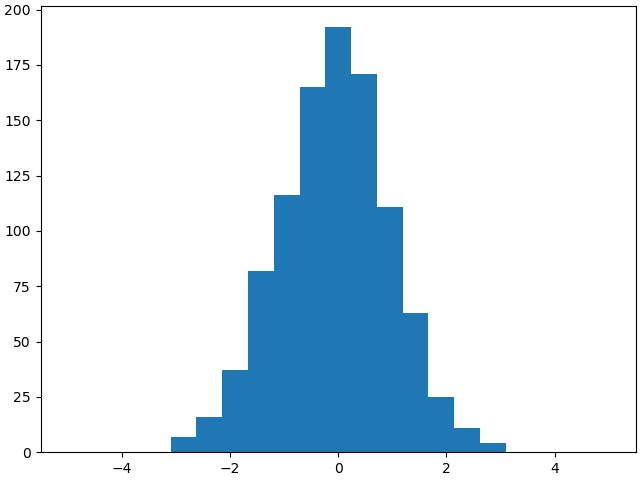

In [91]:
# relatively new feature of matplotlib, use this instead of `plt.tight_layout()`
plt.figure(constrained_layout=True)
plt.hist(gaussian, bins=21, range=[-5, 5])

None # hides matplotlib objects in output, just to not mess up the notebook

When comparing different samples, it's important to use the same "binning"

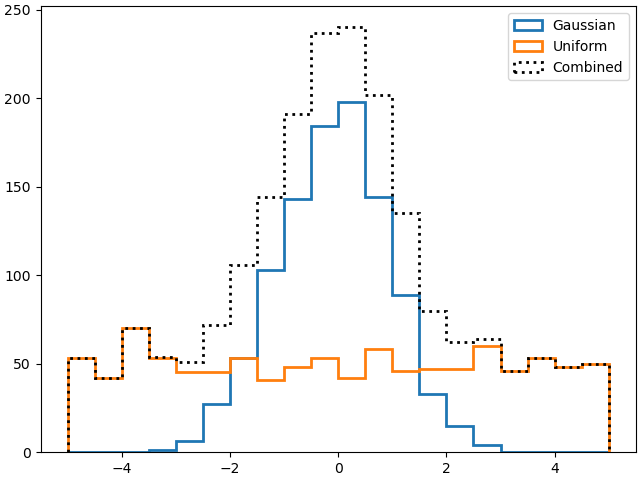

In [80]:
bins = 20
limits = [-5, 5]

combined = np.concatenate([gaussian, uniform])

plt.figure(constrained_layout=True)

# define common options in a single location
hist_options = dict(
    bins=bins,
    range=limits,
    histtype='step',
    lw=2,
)

plt.hist(gaussian, label='Gaussian', **hist_options)
plt.hist(uniform, label='Uniform', **hist_options)
plt.hist(combined, label='Combined', linestyle=':',color='k', **hist_options)

plt.legend()

None  # just to not mess up the notebook

<span style="color: crimson; font-weight: bold; font-size: 2rem">
    For discrete values (integers), always use integral-width bins centered around the values
</span>

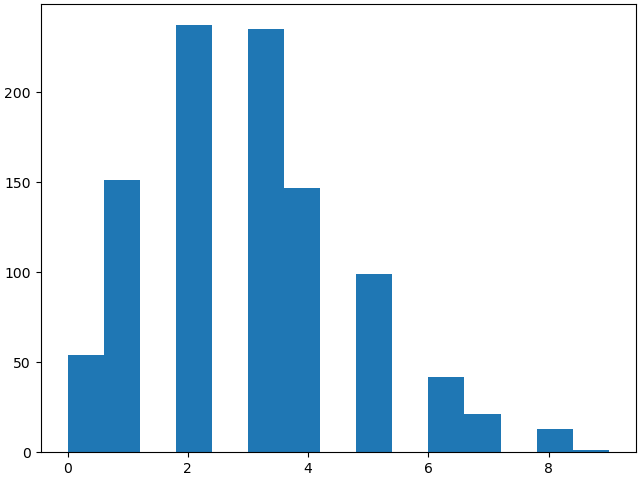

In [92]:
plt.figure(constrained_layout=True)
plt.hist(poisson, bins=15)
None

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
       10.5, 11.5, 12.5, 13.5])

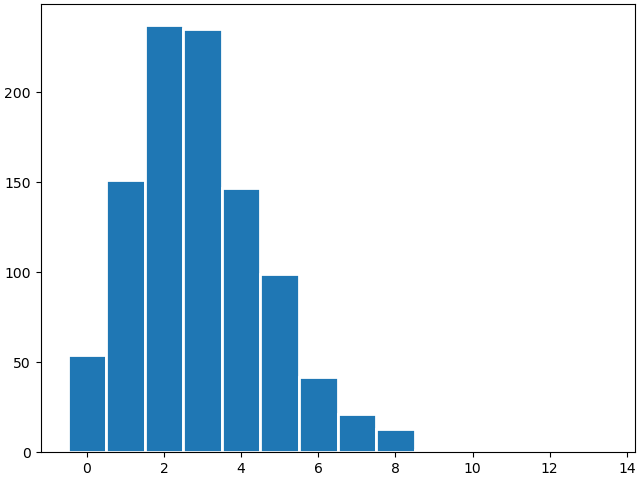

In [93]:
plt.figure(constrained_layout=True)

plt.hist(
    poisson,
    bins=np.arange(15) - 0.5,  # bins can be either number of bins or bin edges
    edgecolor='w',
    lw=2
)


np.arange(15) - 0.5

How to convert bin edges to bin centers / widths

In [94]:
bins = np.arange(8) - 0.5

bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_widths = np.diff(bins)

print(bins)
print(bin_centers)
print(bin_widths)

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5]
[0. 1. 2. 3. 4. 5. 6.]
[1. 1. 1. 1. 1. 1. 1.]


### Scatter Plots

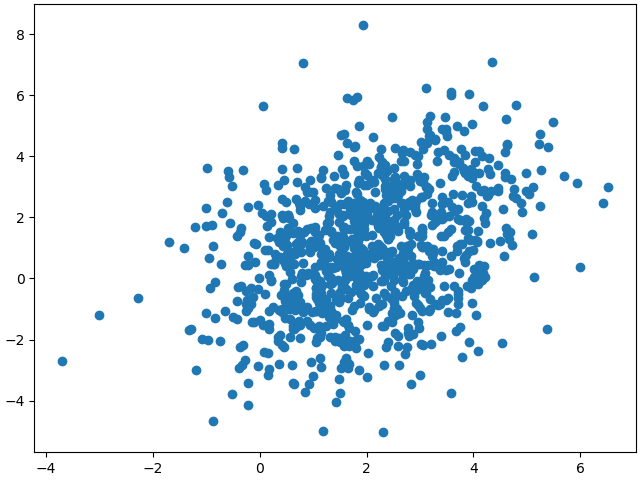

In [95]:
plt.figure(constrained_layout=True)

plt.scatter(gauss_2d[:, 0], gauss_2d[:, 1])

None

/tmp/ipykernel_517/2431712312.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(constrained_layout=True)


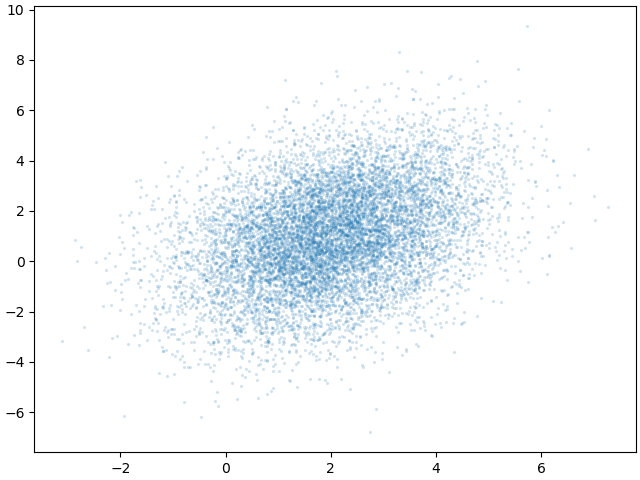

In [101]:
gauss_2d = rng.multivariate_normal(mean, cov, 10000)

plt.figure(constrained_layout=True)

# smaller dots and transparency for this many points
plt.scatter(
    gauss_2d[:, 0],
    gauss_2d[:, 1],
    s=5,
    alpha=0.2,
    linewidth=0,
)

None

A more advanced example:

* Points can be colored using a third array
* Using ListedColorMap, you can get a discrete colormap for each class

In [102]:
from sklearn.datasets import load_iris

iris = load_iris()

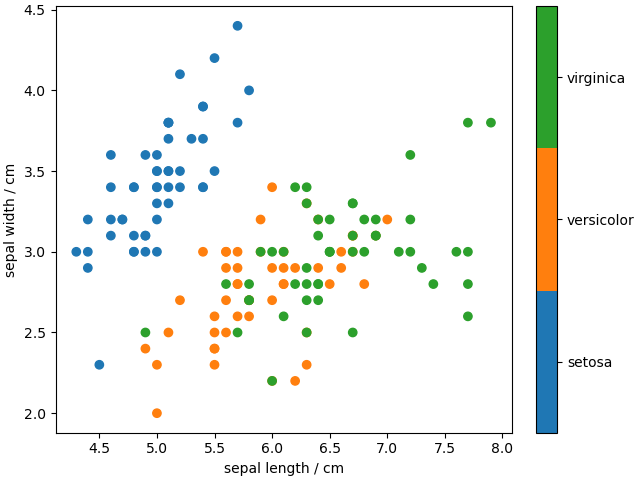

In [103]:
from matplotlib.colors import ListedColormap

n_classes = len(iris.target_names)

# new ColorMap with `n_classes` discrete colors 
# using the standard color rotation C0, C1, ...
cmap = ListedColormap([f'C{i}' for i in range(n_classes)])

# automatically adjust spacing
fig, ax = plt.subplots(constrained_layout=True)

# scatter plot with colors per class
scat = ax.scatter(
    iris.data[:, 0],       # x-values, first column
    iris.data[:, 1],       # y-values, second column 
    c=iris.target,         # data to determine color
    cmap=cmap,             # colormap, converts data in c to an actual color
    vmin=-0.5,             # minimum value for the color axis
    vmax=n_classes - 0.5,  # maximum value for the color axis
)


# follow SI conventions (divide by unit)
ax.set_xlabel(iris.feature_names[0].replace('(cm)', '/ cm'))
ax.set_ylabel(iris.feature_names[1].replace('(cm)', '/ cm'))

# colorbar with ticklabels
bar = fig.colorbar(scat, ticks=[0, 1, 2], ax=ax)
bar.set_ticklabels(iris.target_names)

### 2D-Histograms

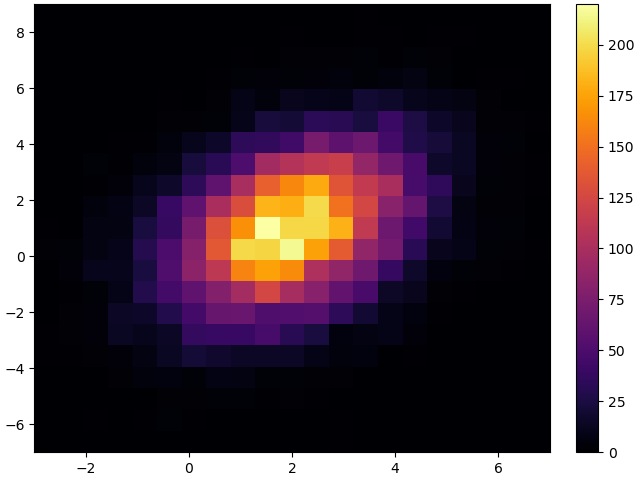

In [104]:
plt.figure(constrained_layout=True)

plt.hist2d(
    gauss_2d[:, 0],
    gauss_2d[:, 1],
    bins=[21, 21],
    range=[[-3, 7], [-7, 9]],
    cmap='inferno', # has more contrast than the default viridis
)
plt.colorbar()
None

Sometimes helpful: Logarithmic scale for the color map

In [105]:
# two different distributions, one significantly smaller
gauss_2d = rng.multivariate_normal(mean, cov, 100000)
gauss_2d_2 = rng.multivariate_normal([-1.5, 4.5], [[0.5, 0], [0, 0.5]], 500)

gauss_2d_both = np.concatenate([gauss_2d, gauss_2d_2], axis=0)
gauss_2d_both.shape

(100500, 2)

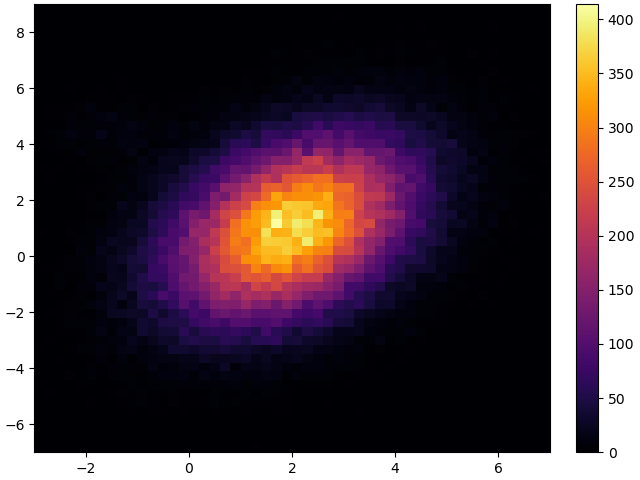

In [106]:
plt.figure(constrained_layout=True)
plt.hist2d(
    gauss_2d_both[:, 0],
    gauss_2d_both[:, 1],
    bins=[50, 50],
    range=[[-3, 7], [-7, 9]],
    cmap='inferno'
)
plt.colorbar()

None

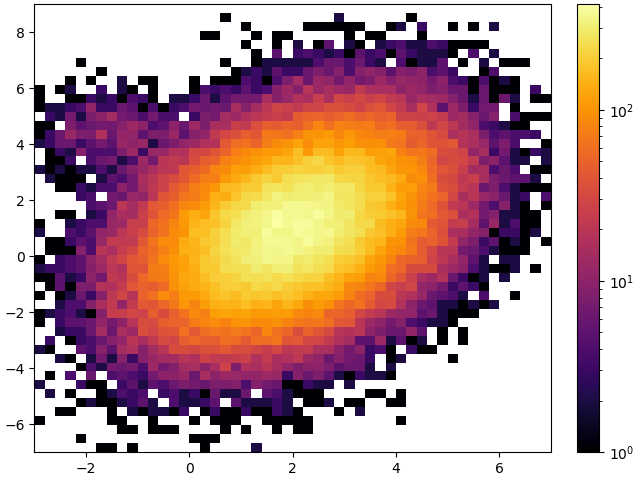

In [107]:
from matplotlib.colors import LogNorm

plt.figure(constrained_layout=True)
plt.hist2d(
    gauss_2d_both[:, 0],
    gauss_2d_both[:, 1],
    bins=[50, 50],
    range=[[-3, 7], [-7, 9]],
    norm=LogNorm(),
    cmap='inferno',
)
plt.colorbar()
None

Also often important: fixed aspect ratio of the x and y axis:

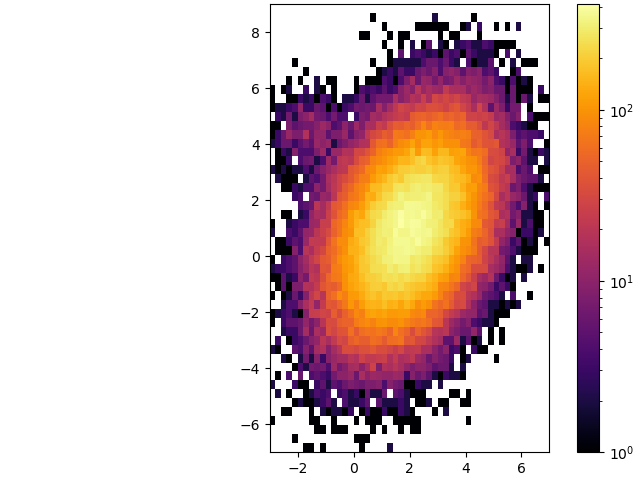

In [108]:
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(constrained_layout=True)

ax.set_aspect('equal')

hist, xbins, ybins, plot = ax.hist2d(
    gauss_2d_both[:, 0],
    gauss_2d_both[:, 1],
    bins=[50, 50],
    range=[[-3, 7], [-7, 9]],
    norm=LogNorm(),
    cmap='inferno',
)

fig.colorbar(plot, ax=ax)

None

## scipy

For SMD-A, `scipy.stats` will be most important

### scipy.stats

Many statistical distributions with many properties

Docs: https://docs.scipy.org/doc/scipy/reference/stats.html

In [109]:
from scipy.stats import norm

mean = 5
std = 2

gaussian = norm(mean, std)

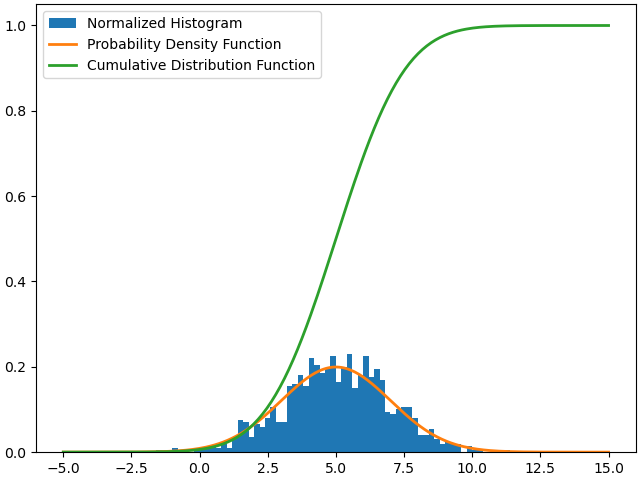

In [110]:
# draw random samples using our generator
samples = gaussian.rvs(size=1000, random_state=rng)

x = np.linspace(mean - 5 * std, mean + 5 * std, 250)

plt.figure(constrained_layout=True)

# plot histogram
plt.hist(
    samples,
    bins=100,
    range=[x.min(), x.max()],
    density=True,  # normalize histgram to an area of 1
    label='Normalized Histogram',
)

# plot pdf and cdf
plt.plot(x, gaussian.pdf(x), label='Probability Density Function', lw=2)
plt.plot(x, gaussian.cdf(x), label='Cumulative Distribution Function', lw=2)


plt.legend()

None

In [111]:
x = rng.normal(5, 2, 100)

# maximum likelihood fit 
mean_fit, std_fit = norm.fit(x)

mean_fit, mean, std_fit, std

(4.858586246165198, 5, 1.9292051677065047, 2)

## Pandas

Library for tabular data

In [112]:
import pandas as pd

### Create a pandas.DataFrame from numpy arrays

In [113]:
signal = pd.DataFrame({
    'x': rng.normal(2, 0.5, 1000),
    'y': rng.uniform(0.5, 1, 1000),
    'N': rng.poisson(50, 1000),
    't': rng.exponential(5, 1000),
})

### First look at the data

In [114]:
signal.head()

,x,y,N,t
0,2.257413,0.576870,52,5.487876
1,1.510447,0.577802,52,0.334212
2,1.103853,0.757532,50,2.883585
3,1.863222,0.823549,39,8.511106
4,2.232373,0.710787,50,16.374553


### Input/Output

In [115]:
signal.to_csv('data.csv')

In [116]:
signal = pd.read_csv('data.csv', index_col=0)

In [117]:
# HDF5 is a fast, binary data format better suited for large datasets
signal.to_hdf('data.hdf5', key='signal')

In [118]:
background = pd.DataFrame({
    'x': rng.uniform(-4, 4, 10000),
    'y': rng.uniform(-4, 4, 10000),
    'N': rng.poisson(30, 10000),
    't': rng.exponential(10, 10000),
})

In [119]:
# you can store more than one dataset in the same file
background.to_hdf('data.hdf5', key='background')

In [120]:
background.head()

,x,y,N,t
0,-1.426659,-2.019896,28,27.628567
1,1.210067,3.638758,36,7.329008
2,2.847064,-3.379551,42,4.603511
3,0.938985,-0.675529,22,13.692985
4,-1.940805,2.202414,34,3.151397


In [121]:
df = pd.read_hdf('data.hdf5', key='signal')

In [122]:
len(df)

1000

Look at the first / last values

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe()

### The titanic dataset

In [ ]:
df = pd.read_csv('titanic.csv')

In [ ]:
df.head()

How many valid values in each column?

In [ ]:
df.count().sort_values(ascending=False)

In [ ]:
df.count().sort_values(ascending=False) / len(df)

Drop columns with too many missing values:

In [ ]:
# axis=1: drop columns
# inplace=True: directly change df
df.drop(['cabin', 'boat', 'body', 'home.dest'], axis="columns", inplace=True) 

df.head()

How many men/women on the titanic?

In [ ]:
df.sex.value_counts()

Very powerful operation: GroupBy → Aggregate

The dataset is split into multiple groups, aggregated values calculated per group.


Example: mean survival rate by sex:

In [ ]:
df.groupby('sex')['survived'].agg('mean')

`DataFrame` also supports mask indexing:

In [ ]:
df['child'] = df.age < 9

df[df['child']]

In [ ]:
df.groupby('child').survived.mean()

## Classes

The overaching task this year is a simplified detector simulation and analysis.

Much of the structure will be predefined, with exercises "filling in blanks".


To understand the structure, some understanding of python classes and tests is helpful

Docs: https://docs.python.org/3/reference/datamodel.html

This is a **very** short primer

In [ ]:
class Detector:
    
    # special method to initialize a new instance of a class
    def __init__(self, width, height):
        self.width = width
        self.height = height

In [ ]:
detector = Detector(width=10, height=5)

print(detector.width, detector.height)

One possible exercise could be to implement a method checking if a particle hits the detector.

Let the coordinate system be defined as follows:
* Lower left corner of the detector is at (0, 0)
* width along x
* height along y


The given structure could then be:

In [ ]:
class Detector:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        
    def is_inside(self, x, y):
        # this is to make the function work without error,
        # but it does not give the correct answer yet
        inside = False
        ###### Implement your solution between here #######
        
        ###### and here #######
        return inside

We will provide tests for most of these, where you can check if your implementation
is correct. For this, we use pytest:

* Docs: https://docs.pytest.org/en/stable/
* Lecture on testing with pytest from the Escape School 2021: https://www.youtube.com/watch?v=pGg97d8TQuY

In [ ]:
def test_is_inside():
    # a test function to be used with `pytest`
    d = Detector(5, 5)

    assert d.is_inside(2, 2), 'This point should be inside'
    assert not d.is_inside(10, 10), 'This point should not be inside'
    print("test passed")
    
test_is_inside()

In Python, we can implement "special" operations on our class using *magic* methods,
which are defined in the data model and for example make operator overloading possible.

These methods always start and end with `__` (double-underscore, "dunder")

In [ ]:
print(Detector(10, 5))

In [ ]:
class Detector:
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def __repr__(self):
        '''This methods enables conversion to a representation str, e.g. for printing'''
        return f'{self.__class__.__name__}(width={self.width}, height={self.height})'

In [ ]:
d = Detector(10, 5)
print(d)